## Pendigits Dataset

### Outlier detector: **IsolationForest(n_estimators=100, random_state=10101)**

In [2]:
import os
import pickle
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt 
from utils import *
from STSC.stsc import *

### set outlier detector parameters 

In [3]:
set_x_generation_paramters(n_estimators=100, random_state=10101)

In [4]:
data, outliers_index, inliers_index = read_dataset('./dataset/pendigits.mat')
dataset_name = 'pendigits'
X, SQ, fp_record = generate_X_SQ(data, outliers_index) # fp_record會回傳數字對應到的feature pair 
G = generate_graph(X)
V = get_V(G)
if not os.path.isfile('./weights/outlier_weight_{}.npy'.format(dataset_name)):
    S = maximum_weight_matching(SQ, V)
    np.save("./weights/outlier_weight_{}".format(dataset_name), S)
else:
    S = np.load("./weights/outlier_weight_{}.npy".format(dataset_name))
C = self_tuning_spectral_clustering_np(S)   
# with open('./weights/{}_cluster_{}.pickle'.format(n_cluster, dataset_name), 'wb') as f:
#     pickle.dump(C, f)
print('number of cluster: ', len(C))

Computing transition probabilities:   0%|          | 0/120 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.65it/s]


n_cluster: 2 	 cost: 197583.840170
n_cluster: 3 	 cost: 10654.095704
n_cluster: 4 	 cost: 4776.794248
n_cluster: 5 	 cost: 3297.281186
number of cluster:  5


In [4]:
W_1 = cvx_solver(C, X, X.shape[1], 1)
W_3 = cvx_solver(C, X, X.shape[1], 3)
W_5 = cvx_solver(C, X, X.shape[1], 5)
W_10 = cvx_solver(C, X, X.shape[1], 10)


### 分別實驗 lambda=1、3、5、10

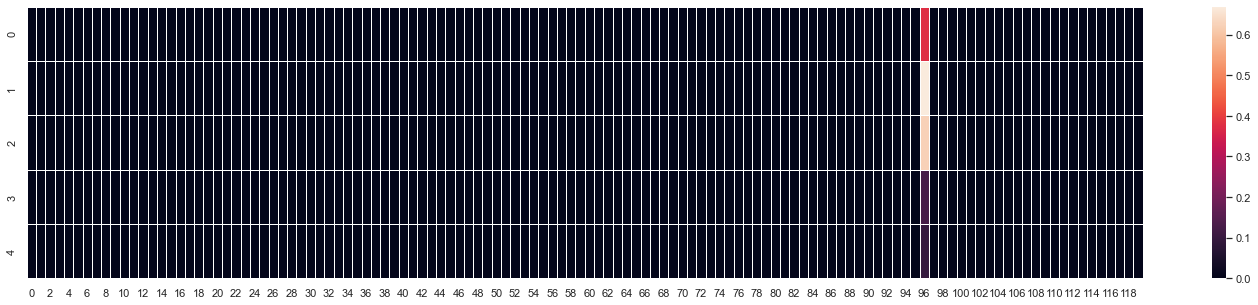

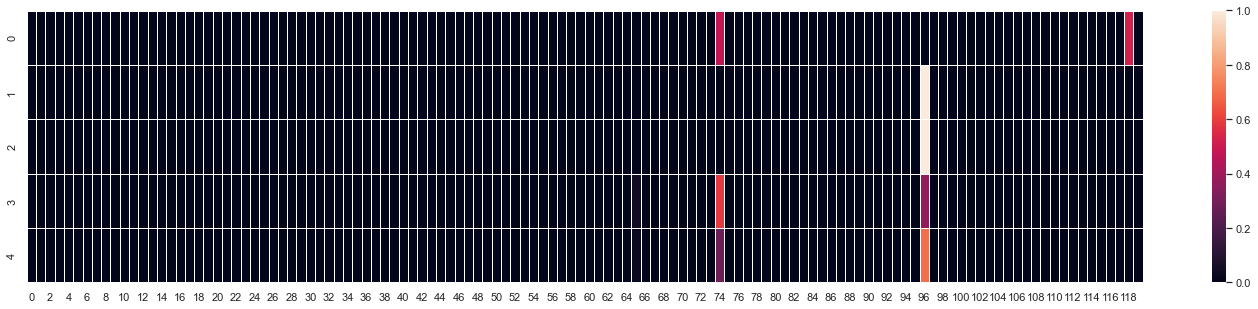

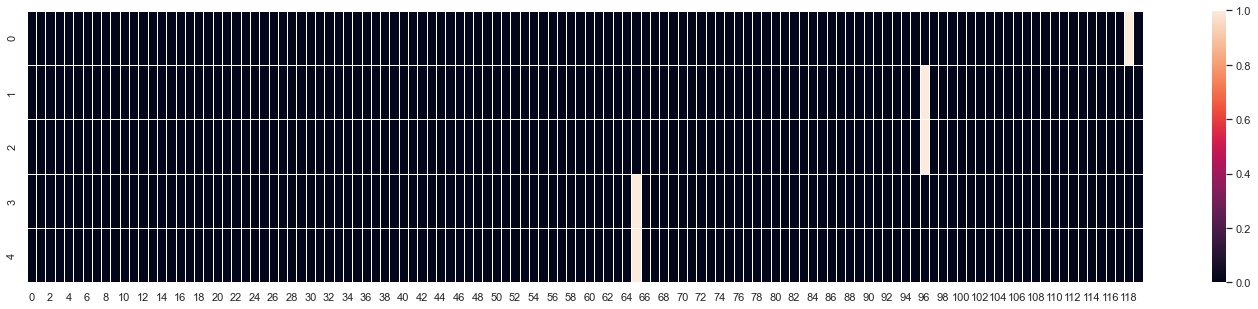

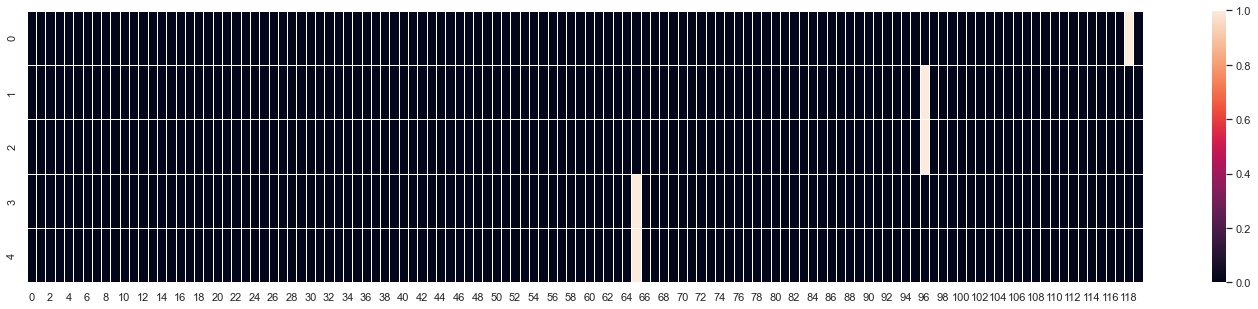

In [5]:
draw_heatmap(W_1.T) # lambda = 1  <====== global 
draw_heatmap(W_3.T) # lambda = 3 
draw_heatmap(W_5.T) # lambda = 5
draw_heatmap(W_10.T)   # lambda = 10  <===== local

### 為每個cluster找出最佳的feature pairs

In [6]:
cluster_fp_1 = get_clusters_fps(W_1.T, fp_record)
cluster_fp_3 = get_clusters_fps(W_3.T, fp_record)
cluster_fp_5 = get_clusters_fps(W_5.T, fp_record)
cluster_fp_10 = get_clusters_fps(W_10.T, fp_record)

max = []
for i in cluster_fp_10:
    if len(i) > 0:
        max.append(i[0])
max = np.array(max)

In [7]:
df_list = [create_df(data[outliers_index], data[inliers_index], C[i]) for i in range(len(C))]

### Lambda = 1  Incrimination

In [8]:
get_incrimination(C, X, X.shape[1] , W_1.T, 3)

------------------
[0.8235860913116317, 0.9228489721886013, 0.949281189709067]
[0.9194461465814429, 0.9463783420377502, 0.9614478049042215]
------------------
[0.9638569946777453, 0.9676041221560152, 0.9751937523420078]
[0.9638569946777453, 0.976984396381544, 0.979568483863329]
------------------
[0.8336046406358111, 0.857196740189597, 0.8929155883596992]
[0.8113660861725042, 0.9599520798527422, 0.9600886074711916]
------------------
[0.8626875730510614, 0.8626875730510614, 0.9405812215879978]
[0.9646419987642766, 0.9761777509992475, 0.9885031561452761]
------------------
[0.9535404094949474, 0.9620474999761535, 0.9685528937462737]
[0.9616226974923788, 0.9837588170152916, 0.9837588170152916]


### Lambda = 10  Incrimination

In [9]:
get_incrimination(C, X, X.shape[1] , W_10.T, 3)

------------------
[0.9194461465814429, 0.9463783420377502, 0.9496870896075134]
[0.9194461465814429, 0.9463783420377502, 0.9614478049042215]
------------------
[0.9638569946777453, 0.9676041221560152, 0.9676041221560152]
[0.9638569946777453, 0.976984396381544, 0.979568483863329]
------------------
[0.8336046406358111, 0.857196740189597, 0.9562478051763839]
[0.8113660861725042, 0.9599520798527422, 0.9600886074711916]
------------------
[0.9646419987642766, 0.974456867939672, 0.9906528772006498]
[0.9646419987642766, 0.9761777509992475, 0.9885031561452761]
------------------
[0.9616226974923788, 0.9757245522400845, 0.9757245522400845]
[0.9616226974923788, 0.9837588170152916, 0.9837588170152916]


### Lambda = 1 

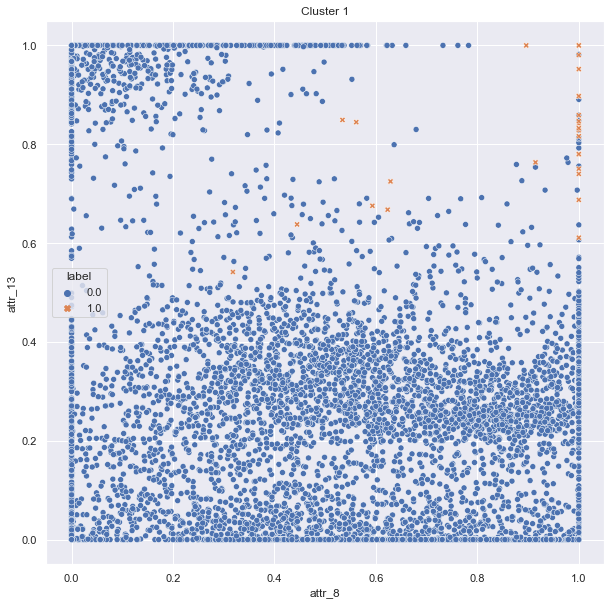

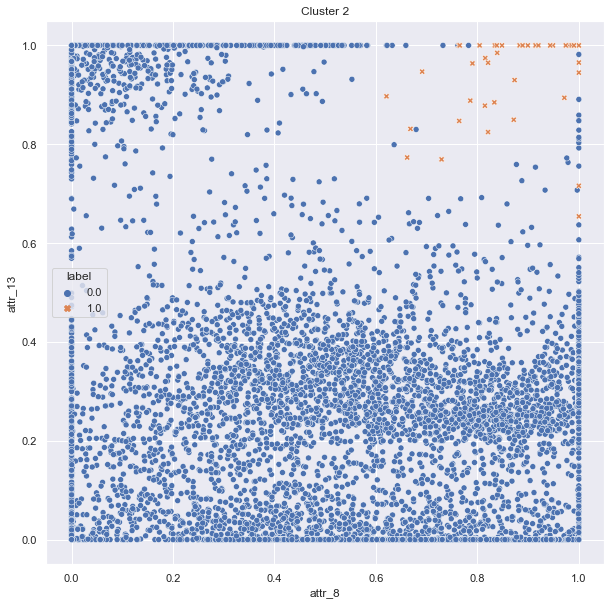

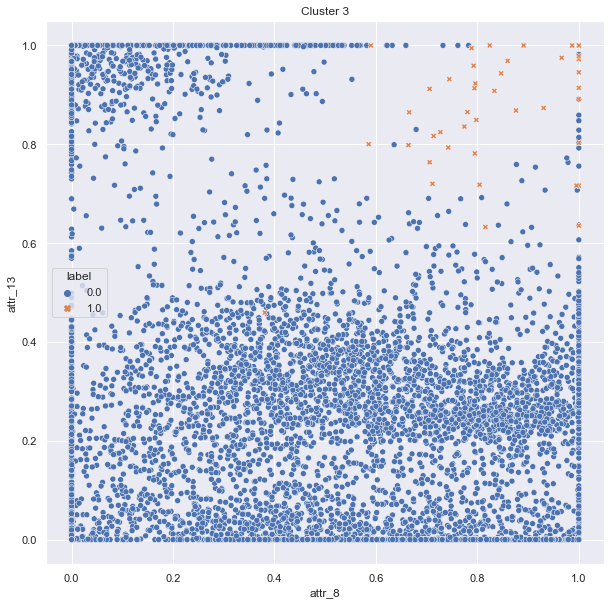

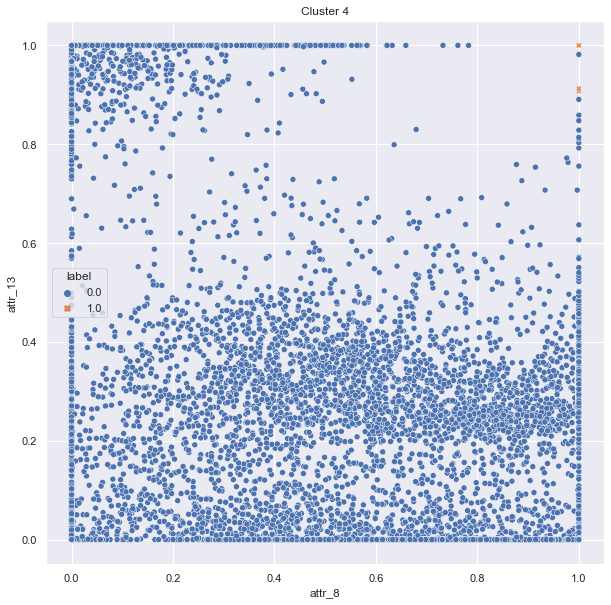

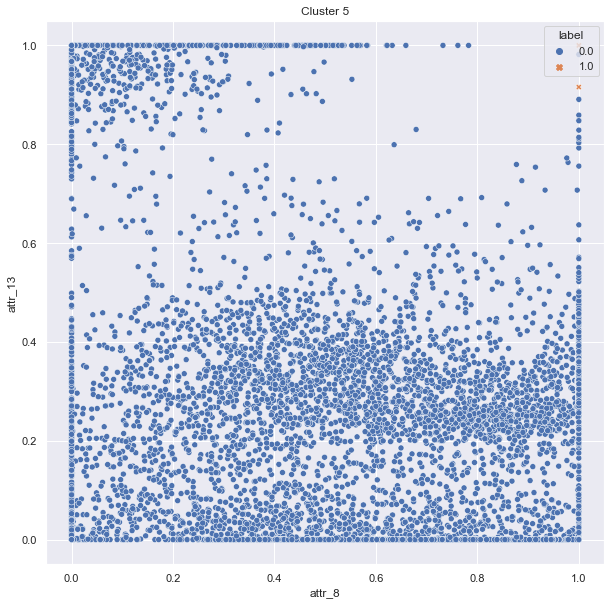

In [10]:
draw_scatter(df_list, cluster_fp_1)

### Lambda = 3 

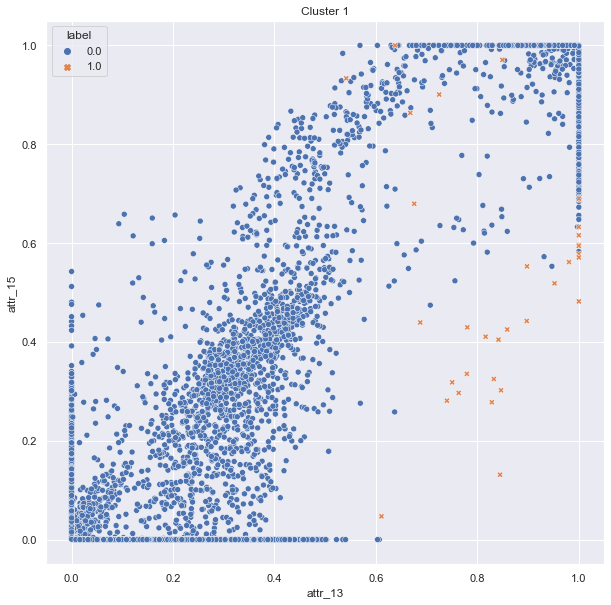

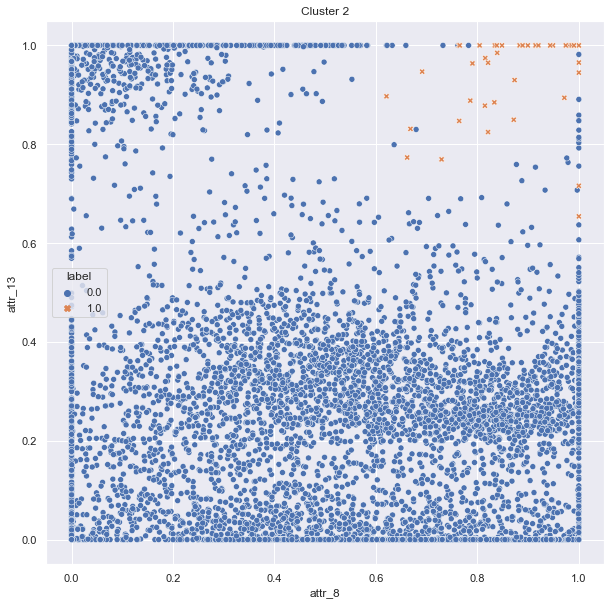

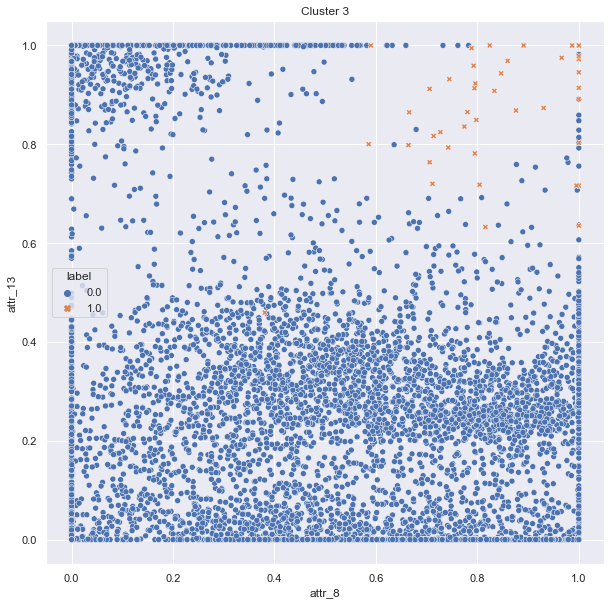

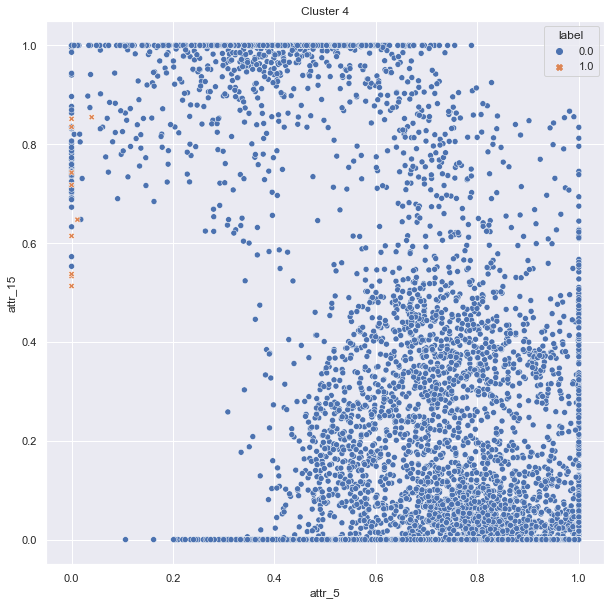

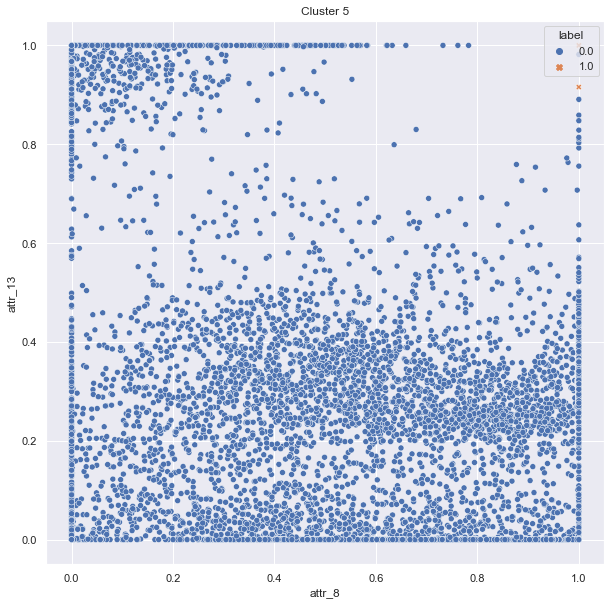

In [11]:
draw_scatter(df_list, cluster_fp_3)

### Lambda = 5

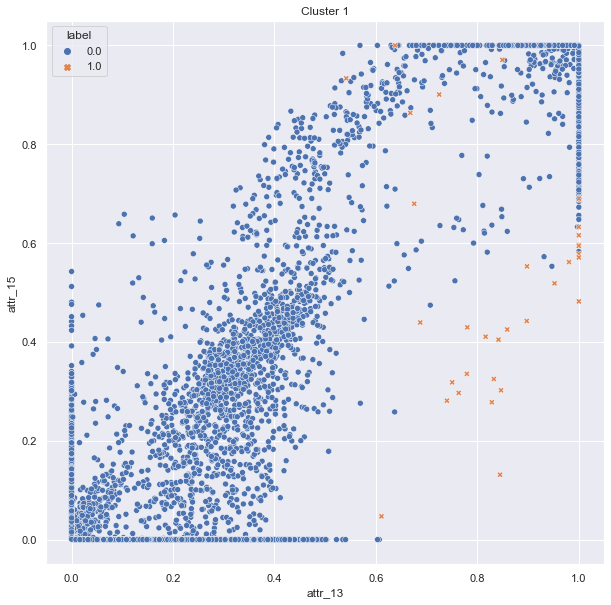

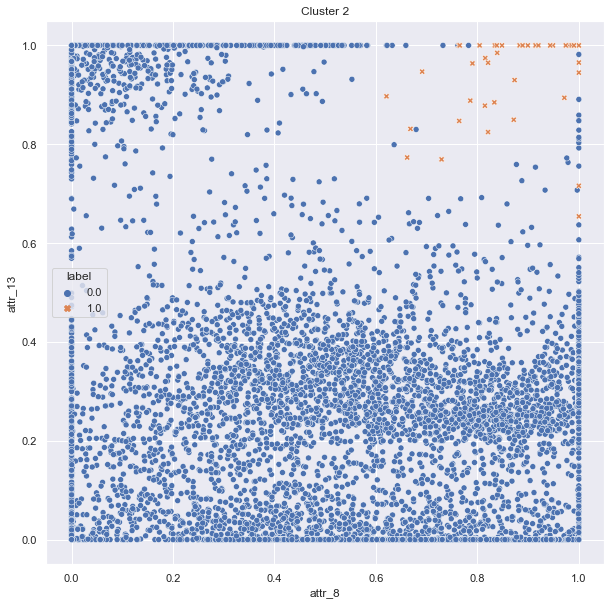

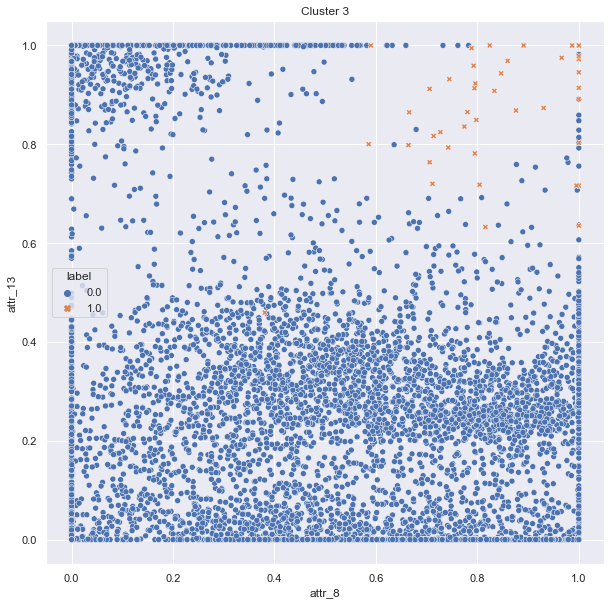

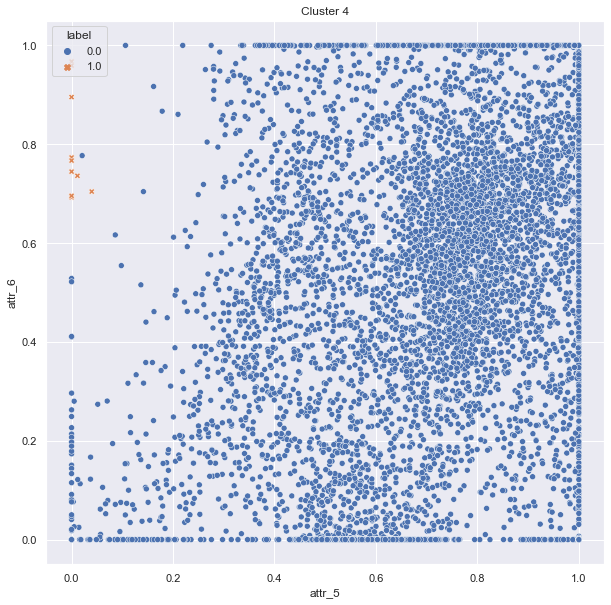

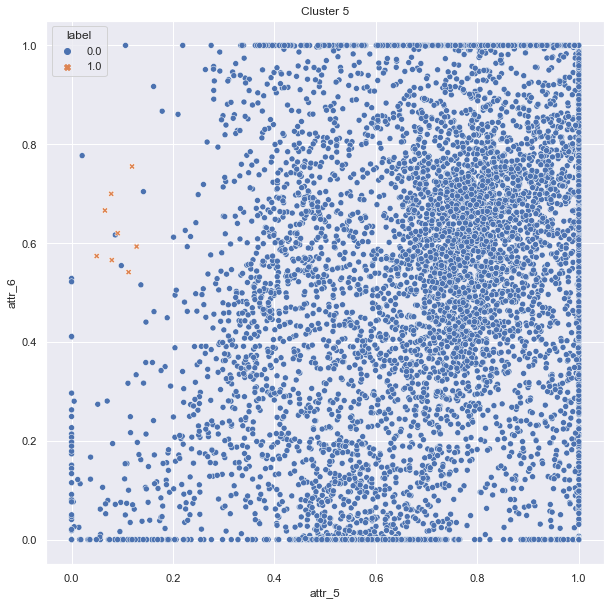

In [12]:
draw_scatter(df_list, cluster_fp_5)

### Lambda = 10

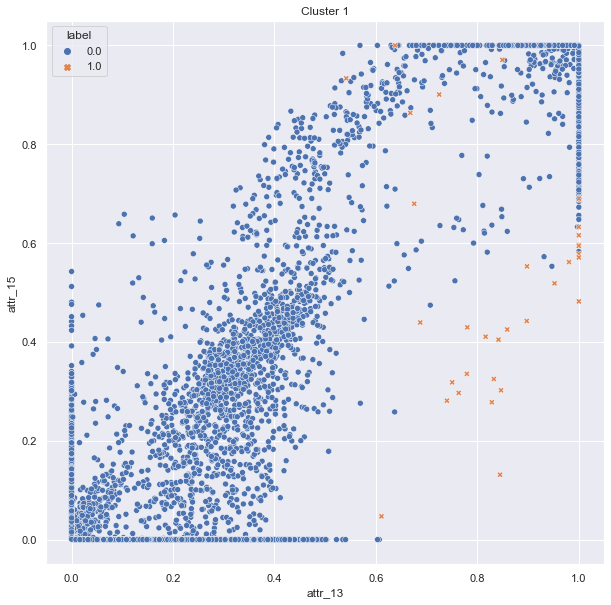

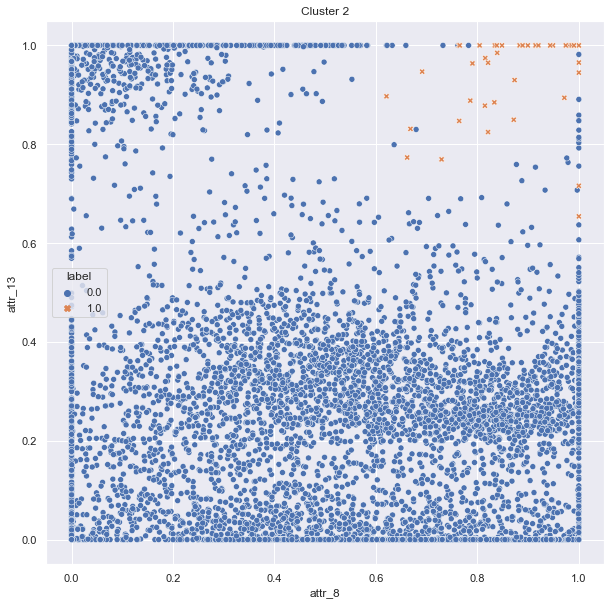

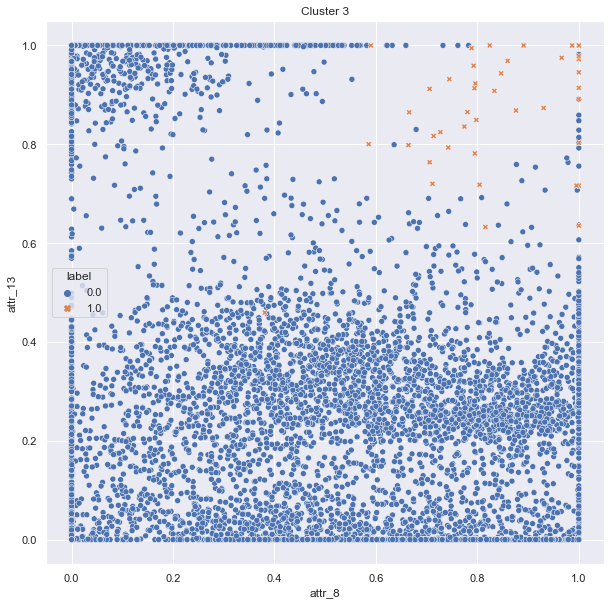

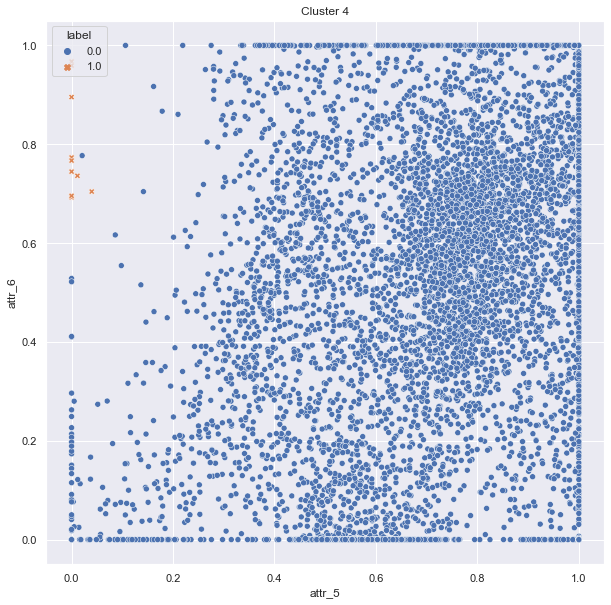

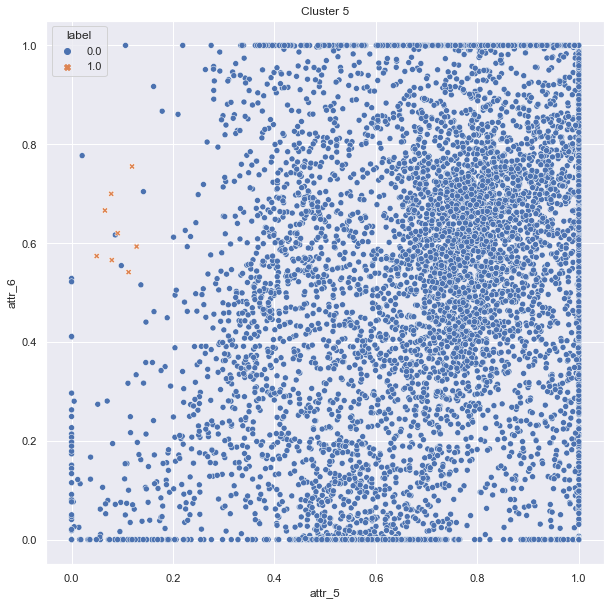

In [13]:
draw_scatter(df_list, cluster_fp_5)